In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython import display

In [112]:
df=pd.read_csv("Algerian_forest_fires.csv",header=1)

In [113]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [114]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [115]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

## Data Cleaning

In [116]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [117]:
df.loc[:122,"Region"]=0 # assigns the value 0 to the "Region" column for all rows from the beginning up to and including index 122.
df.loc[122:,"Region"]=1 # assigns the value 1 to the "Region" column for all rows from index 122 to the end of the DataFrame.

In [118]:
df["Region"]=df["Region"].astype("int16")

In [119]:
df=df.dropna().reset_index(drop=True)

In [120]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [121]:
df=df.drop(122).reset_index(drop=True)

In [122]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int16 
dtypes: int16(1), object(14)
memory usage: 27.2+ KB


In [124]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool

In [125]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [126]:
df.columns=df.columns.str.strip()

In [127]:
## changing type of data from object to int
df[["day","month","year","Temperature","RH","Ws"]]=df[["day","month","year","Temperature","RH","Ws"]].astype("int16")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int16 
 1   month        243 non-null    int16 
 2   year         243 non-null    int16 
 3   Temperature  243 non-null    int16 
 4   RH           243 non-null    int16 
 5   Ws           243 non-null    int16 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int16 
dtypes: int16(7), object(8)
memory usage: 18.6+ KB


In [129]:
objects=[feature for feature in df.columns if df[feature].dtypes=="O"]

In [130]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [131]:
for i in objects:
    if i!="Classes":
        df[i]=df[i].astype(float)


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int16  
 1   month        243 non-null    int16  
 2   year         243 non-null    int16  
 3   Temperature  243 non-null    int16  
 4   RH           243 non-null    int16  
 5   Ws           243 non-null    int16  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int16  
dtypes: float64(7), int16(7), object(1)
memory usage: 18.6+ KB


In [133]:
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv",index=False)

#EDA : Data Cleaning - Feature Engineering,Feature Selection,Feature transformation,Feature Scalling - Visualization

In [134]:
new=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [135]:
new

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [136]:
new2=new.drop(["day","month","year"],axis=1)

In [137]:
new2

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [138]:
new2.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

## feature engineering

In [139]:
# it replaces not fire with the value 0
new2.Classes=np.where(new2.Classes.str.contains("not fire"),0,1)

In [140]:
new2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [141]:
new2.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

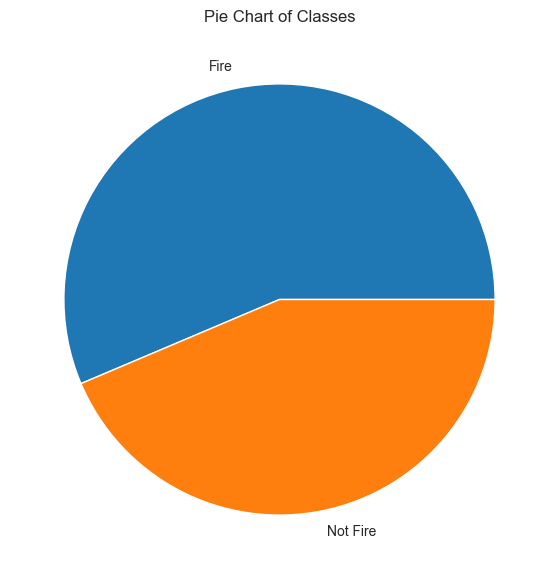

In [142]:
import matplotlib.pyplot as plt

# Assuming new2 is your DataFrame and 'Classes' is the column you want to plot
classlabel = ["Fire", "Not Fire"]

plt.figure(figsize=(12, 7))
plt.pie(new2['Classes'].value_counts(normalize=True), labels=classlabel)
plt.title("Pie Chart of Classes")
plt.show()


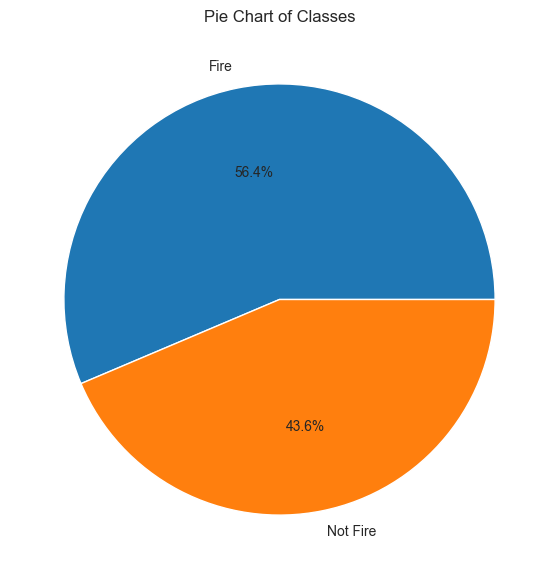

In [143]:
import matplotlib.pyplot as plt

# Assuming new2 is your DataFrame and 'Classes' is the column you want to plot
classlabel = ["Fire", "Not Fire"]

plt.figure(figsize=(12, 7))
plt.pie(new2['Classes'].value_counts(normalize=True) * 100, labels=classlabel, autopct="%1.1f%%")
plt.title("Pie Chart of Classes")
plt.show()


##June 18

In [144]:
new2.corr()*100

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,100.000000,-65.140034,-28.450989,-32.649192,67.656815,48.568692,37.628353,60.387056,45.978947,56.666988,51.601549,26.955546
RH,-65.140034,100.000000,24.404838,22.235608,-64.487346,-40.851919,-22.694112,-68.666704,-35.384055,-58.095675,-43.216074,-40.268162
Ws,-28.450989,24.404838,100.000000,17.150618,-16.654827,-0.072097,7.913451,0.853169,3.143841,3.236777,-6.996363,-18.115952
Rain,-32.649192,22.235608,17.150618,100.000000,-54.390619,-28.877293,-29.802308,-34.748393,-29.985152,-32.442156,-37.909717,-4.001263
FFMC,67.656815,-64.487346,-16.654827,-54.390619,100.000000,60.360764,50.739666,74.000683,59.201101,69.113197,76.949230,22.224072
DMC,48.568692,-40.851919,-0.072097,-28.877293,60.360764,100.000000,87.592466,68.045433,98.224849,87.586416,58.565777,19.208879
DC,37.628353,-22.694112,7.913451,-29.802308,50.739666,87.592466,100.000000,50.864325,94.198846,73.952056,51.112333,-7.873397
ISI,60.387056,-68.666704,0.853169,-34.748393,74.000683,68.045433,50.864325,100.000000,64.409260,92.289493,73.519739,26.319709
BUI,45.978947,-35.384055,3.143841,-29.985152,59.201101,98.224849,94.198846,64.409260,100.000000,85.797310,58.663949,8.940833
FWI,56.666988,-58.095675,3.236777,-32.442156,69.113197,87.586416,73.952056,92.289493,85.797310,100.000000,71.921615,19.710233


<Axes: >

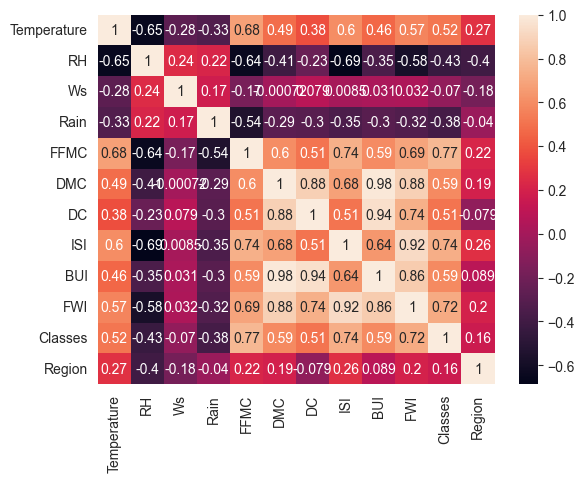

In [145]:
sns.heatmap(new2.corr(),annot=True)

<Axes: ylabel='FWI'>

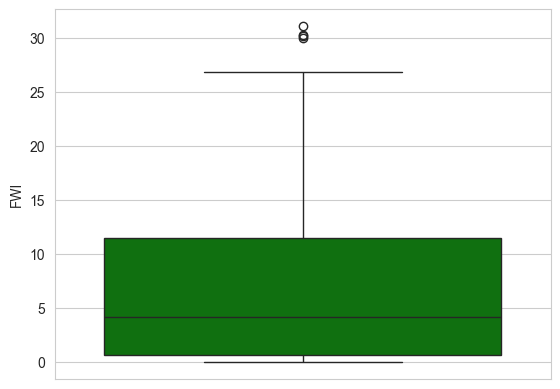

In [146]:
sns.boxplot(new2["FWI"],color="Green")

In [147]:
new.Classes=np.where(new.Classes.str.contains("not fire"),0,1)

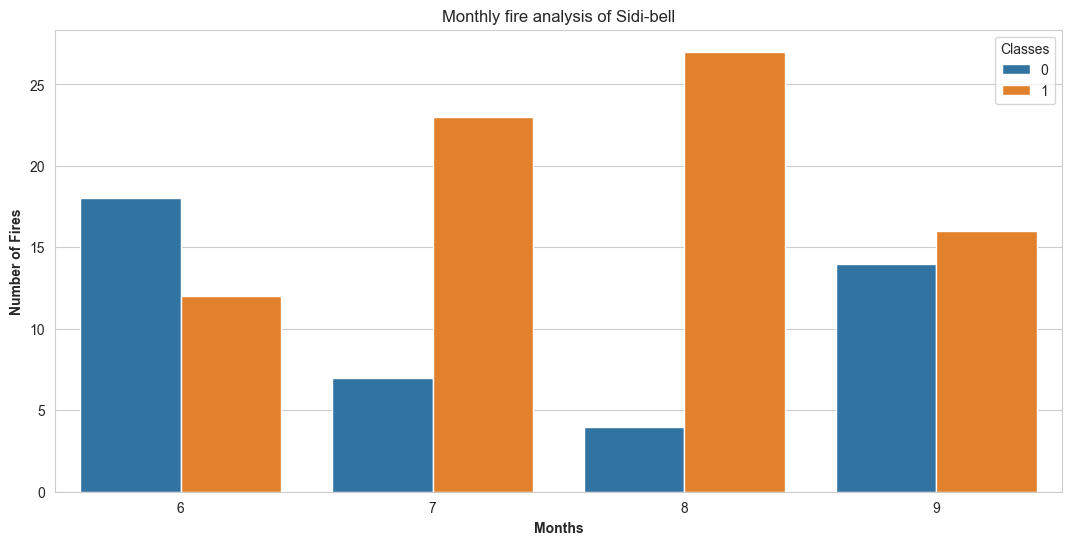

In [148]:
## Monthly fire analysis

temp=new.loc[new["Region"]==1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(data=temp,x="month",hue="Classes")
plt.ylabel("Number of Fires",weight="bold")
plt.xlabel("Months",weight="bold")
plt.title("Monthly fire analysis of Sidi-bell")
plt.show()

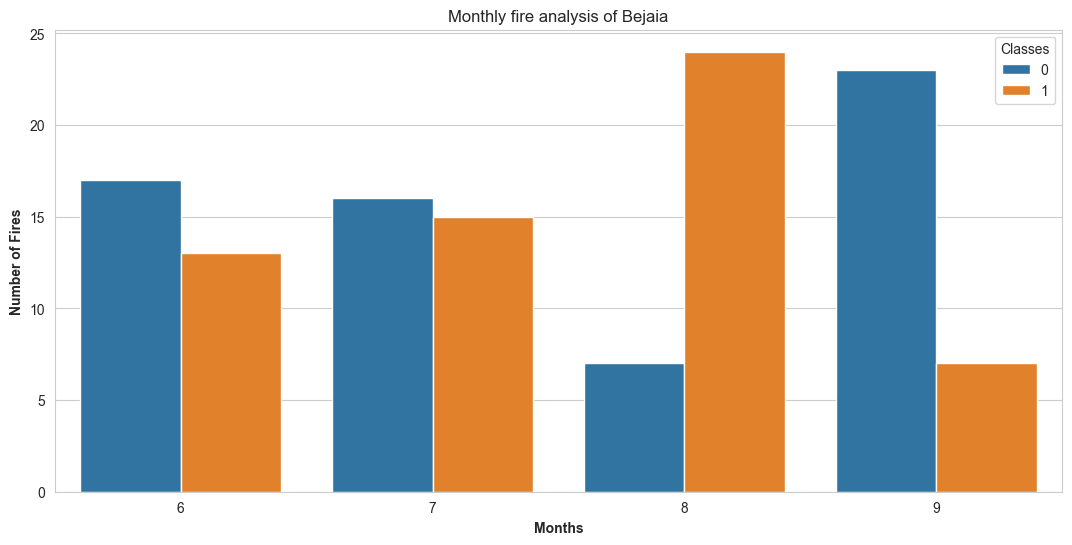

In [149]:
## Monthly fire analysis of Bejaia region

temp=new.loc[new["Region"]==0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(data=temp,x="month",hue="Classes")
plt.ylabel("Number of Fires",weight="bold")
plt.xlabel("Months",weight="bold")
plt.title("Monthly fire analysis of Bejaia")
plt.show()

##### it is observed that the most of the fires happened in August in both regions.
Most sesitive month for fire are: june,july and september for sidi bel and june july and august for bejaia region

## Model Training

In [150]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [151]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [152]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [153]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [154]:
df.Classes=np.where(df.Classes.str.contains("not fire"),0,1)

In [155]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [156]:
y=pd.DataFrame(df.iloc[:,-3])

In [157]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [158]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [159]:
corr_features=correlation(df,0.85)

In [160]:
corr_features

{'BUI', 'DC', 'FWI'}

In [161]:
df.drop(corr_features,axis=1,inplace=True)

In [162]:
df


,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0,0
...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,4.5,1,1
239,28,87,15,4.4,41.1,6.5,0.1,0,1
240,27,87,29,0.5,45.9,3.5,0.4,0,1
241,24,54,18,0.1,79.7,4.3,1.7,0,1


In [163]:
x=df

In [164]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0,0
...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,4.5,1,1
239,28,87,15,4.4,41.1,6.5,0.1,0,1
240,27,87,29,0.5,45.9,3.5,0.4,0,1
241,24,54,18,0.1,79.7,4.3,1.7,0,1


In [165]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [166]:
y_test

,FWI
24,8.4
6,7.2
152,0.5
232,3.8
238,6.5
...,...
162,0.8
178,9.0
224,3.9
230,15.4


In [167]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
score=r2_score(y_test,y_pred)
print("R2 Score",score)

R2 Score 0.9847657384266952


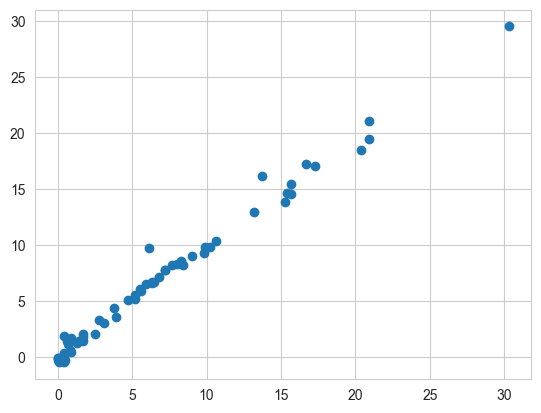

In [110]:
plt.scatter(y_test,y_pred)